# yo yo yo

## 1. Import packages


In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

## 2. Obtain data from yfinance

We will start with collecting data from a single stock

In [11]:
# Define the start and end dates
start_date = "2021-01-01"
end_date = "2022-02-01"

# Choose your favorite stock
ticker  = "NVDA"
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

[*********************100%%**********************]  1 of 1 completed


We can check to makesure that the type of the data we just downloaded is a pandas dataframe (which is very convenient)

In [12]:
type(data)

pandas.core.frame.DataFrame

We can look at the first five entries of the data

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.851593,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.757828,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,125.872375,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.151657,46148000
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.480606,29252800


## 3. Adding indicator features from TA-lib

Let's first checkout what indicators we can add (there's a lot!)

In [14]:
from talib.abstract import *
for group, funcs in talib.get_function_groups().items():
    print(group)
    print('-----------------------------------------')
    for func in funcs:
        f = Function(func)
        print('{} - {}'.format(func, f.info['display_name']))
        print(f"Inputs: {f.input_names}\n")
        
    print()

Cycle Indicators
-----------------------------------------
HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
Inputs: OrderedDict([('price', 'close')])

HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
Inputs: OrderedDict([('price', 'close')])

HT_PHASOR - Hilbert Transform - Phasor Components
Inputs: OrderedDict([('price', 'close')])

HT_SINE - Hilbert Transform - SineWave
Inputs: OrderedDict([('price', 'close')])

HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
Inputs: OrderedDict([('price', 'close')])


Math Operators
-----------------------------------------
ADD - Vector Arithmetic Add
Inputs: OrderedDict([('price0', 'high'), ('price1', 'low')])

DIV - Vector Arithmetic Div
Inputs: OrderedDict([('price0', 'high'), ('price1', 'low')])

MAX - Highest value over a specified period
Inputs: OrderedDict([('price', 'close')])

MAXINDEX - Index of highest value over a specified period
Inputs: OrderedDict([('price', 'close')])

MIN - Lowest value over a specified period
Inp

If the output is trunkcated, probably click on "view as a scrollable" or something like that

Or just checkout: https://github.com/TA-Lib/ta-lib-python#overlap-studies

We can start by adding some simple indicators, for example, the simple moving average (SMA), which just takes in the closing prices, and a custom period (SMA over 30, 60, or 120 days). 

In [15]:
# Moving Averages
data['SMA30'] = talib.SMA(data['Adj Close'],timeperiod=30)
data['SMA60'] = talib.SMA(data['Adj Close'],timeperiod=60)
data['SMA120'] = talib.SMA(data['Adj Close'],timeperiod=120)

We can also add some other indicators:

CCI - some momentum indicator that I don't know how it is calculated

NATR - some volatility indicator that I also don't know about


In [19]:
 # Momentum Indicator: Commodity Channel Index
data['cci'] = talib.CCI(data['High'], data['Low'],data['Close'])

# Volatility Indicator: Normalized Average True Range
data['natr'] = talib.NATR(data['High'], data['Low'], data['Adj Close'], timeperiod=14)

Now we can check out the head of the dataframe again, and we'll see three extra columns

In [20]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,SMA120,cci,natr
Date,,,,,,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.851593,56064000,NaN,NaN,NaN,NaN,NaN
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.757828,32276000,NaN,NaN,NaN,NaN,NaN
2021-01-06,132.225006,132.449997,125.860001,126.144997,125.872375,58042400,NaN,NaN,NaN,NaN,NaN
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.151657,46148000,NaN,NaN,NaN,NaN,NaN
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.480606,29252800,NaN,NaN,NaN,NaN,NaN


Oh no, there are some NaN values. What happened?

This is because, for the moving averages, we need at least 30 days (or 60, 120 accordingly) in order to calculate for the average of that time interval.

So, if we look at the tail of the dataframe, we'll see that there are actual values.

In [21]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,SMA120,cci,natr
Date,,,,,,,,,,,
2022-01-25,225.460007,229.429993,220.000000,223.240005,222.952148,66461600,277.177782,290.538820,253.048964,-148.965327,6.810603
2022-01-26,232.399994,240.570007,223.000000,227.720001,227.426361,75595900,275.383767,290.074109,253.227164,-101.365414,6.753045
2022-01-27,235.679993,239.949997,216.750000,219.440002,219.157028,57335300,273.255516,289.428304,253.359001,-100.143481,7.263437
2022-01-28,220.119995,228.580002,212.960007,228.399994,228.105469,54377400,270.719122,288.836107,253.571316,-91.464344,6.969155
2022-01-31,231.820007,245.089996,230.520004,244.860001,244.544250,56468000,269.420466,288.485103,253.950489,-27.144452,6.532438


Yes

So what do we do with those empty (NaN) values

Simple answer: just remove them

In [22]:
data.dropna()

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,SMA120,cci,natr
Date,,,,,,,,,,,
2021-06-24,192.277496,194.199997,190.882507,192.054993,191.750031,32092400,166.452890,157.071513,145.608078,134.993250,2.764750
2021-06-25,192.804993,193.455002,188.945007,190.309998,190.007812,27836400,168.239675,158.017642,146.101047,98.848925,2.760349
2021-06-28,193.612503,200.787506,193.190002,199.850006,199.532684,49543600,170.151723,159.045410,146.649171,147.158581,2.826717
2021-06-29,198.824997,200.987503,196.570007,200.267502,199.949509,36763200,172.103451,160.050887,147.266480,134.726477,2.777144
2021-06-30,199.992493,201.625000,198.637497,200.024994,199.707397,32656800,174.096935,161.073291,147.821111,125.669135,2.688756
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25,225.460007,229.429993,220.000000,223.240005,222.952148,66461600,277.177782,290.538820,253.048964,-148.965327,6.810603
2022-01-26,232.399994,240.570007,223.000000,227.720001,227.426361,75595900,275.383767,290.074109,253.227164,-101.365414,6.753045
2022-01-27,235.679993,239.949997,216.750000,219.440002,219.157028,57335300,273.255516,289.428304,253.359001,-100.143481,7.263437


## Your turn: find some interesting indicators, use the 5th cell to see their inputs, and add them to our dataframe

(Maybe something thats worth looking into is the Bollinger Bands)

Also, feel free to explore and look into different things 

In [ ]:
# Add add add 

## 3. Data Visualization

Now, since we have the data, we probably want to visualize our data to see which features are good / worth to include in our model

Here is just a common way to visualize stock data: we plot the price(Adj close) and the moving averages on the same line plot

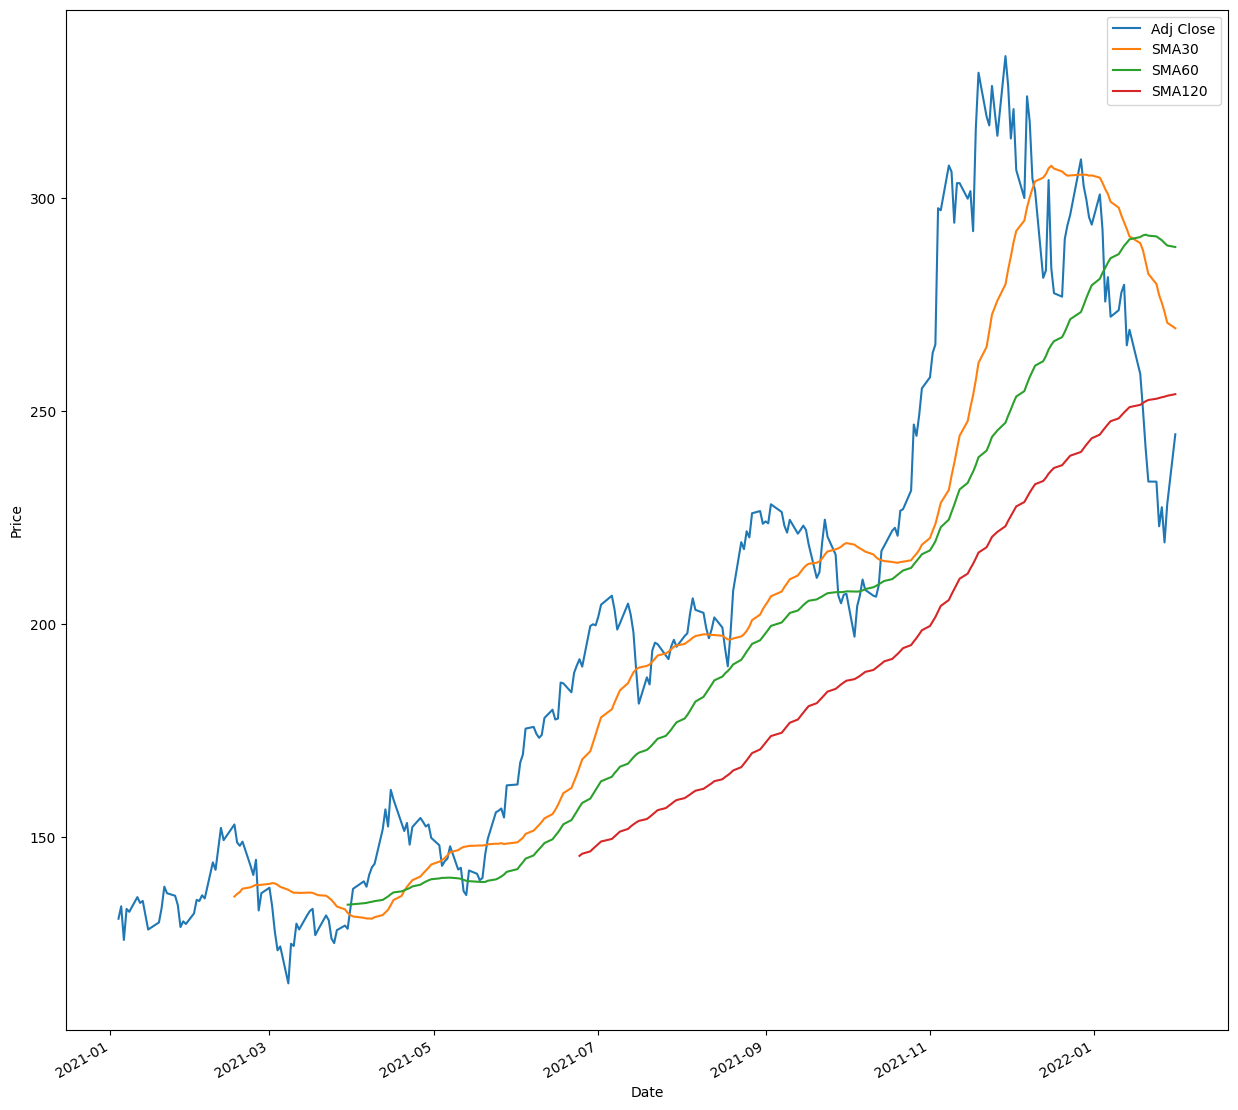

In [25]:
data[['Adj Close','SMA30','SMA60', 'SMA120']].plot(figsize=(15,15))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()